In [1063]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [1064]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [1065]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [1066]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    if game_num == 0:
        continue
        
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    
    if old_score == 0:
        continue
        
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and one_date < '2018-09-16_17-00-24' and elo < 0:
        elo = 0
    #elif one_date >= '2018-09-16_17-00-24' and elo < -100:
    #    elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

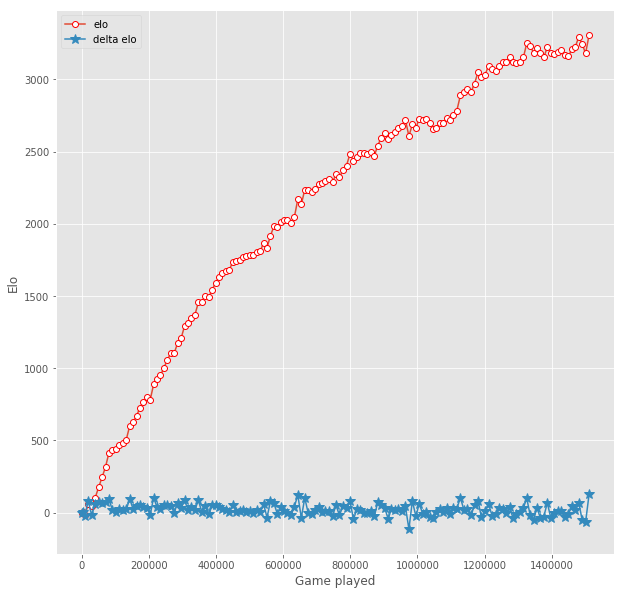

In [1067]:
plt.figure(figsize=(10,10))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [1068]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i == 0 else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
139,2018-10-08_21-50-16_noup,12.697361,3189.231985,1418484,10573,0.022831,219,0.518265,上位
140,2018-10-09_00-20-13_noup,11.109031,3200.341016,1428551,10067,0.045662,219,0.515982,上位
141,2018-10-09_02-30-13_noup,-30.218785,3170.122231,1438857,10306,0.027397,219,0.456621,上位
142,2018-10-09_04-50-14_noup,-9.564863,3160.557368,1449546,10689,0.036697,218,0.486239,上位
143,2018-10-09_07-00-23_noup,46.827908,3207.385277,1460048,10502,0.033493,209,0.566986,上位
144,2018-10-09_09-10-23_noup,19.056654,3226.441931,1470332,10284,0.041096,219,0.527397,上位
145,2018-10-09_11-30-14_noup,67.466896,3293.908827,1480713,10381,0.022831,219,0.595890,上位
146,2018-10-09_13-40-14_noup,-51.132846,3242.775981,1490736,10023,0.041096,219,0.426941,上位
147,2018-10-09_16-30-19_noup,-63.127985,3179.647996,1500919,10183,0.046083,217,0.410138,上位
148,2018-10-09_19-40-26_noup,127.601347,3307.249342,1511270,10351,0.109589,219,0.675799,上位


In [1138]:
!ls -l ../data/distributed/ | wc -l 

8292


In [1116]:
!ls -l ../data/distributed/ | grep peace | wc -l

14


In [1095]:
!ls -l ../data/distributed/ | grep '_w'| wc -l 

4136


In [1096]:
!ls -l ../data/distributed/ | grep '_b'| wc -l 

3506


In [1139]:
! date

2018年 10月 10日 星期三 06:54:42 CST


In [1140]:
!nvidia-smi

Wed Oct 10 06:54:46 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 40%   68C    P2    75W / 250W |   2265MiB / 11172MiB |     23%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:42:00.0 Off |                  N/A |
| 26%   46C    P8     9W / 250W |    285MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        